#Feature Importance Exploration: Cervical Cancer Risk Factors & Bike Sharing Datasets


Setting Up the Environment

In [2]:
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


B. Cervical Cancer Risk Factors Dataset

1. Introduction
The Cervical Cancer Risk Factors dataset contains various factors that might affect the likelihood of cervical cancer. Feature importance will help us
determine which of these factors are most predictive.


2. Loading Data and Initial Exploration

In [3]:
# Load cervical cancer dataset from the UCI repository
url_cervical = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
data_cervical = pd.read_csv(url_cervical)

# Display the first few rows of the dataset for a quick overview
data_cervical.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


3. Data Preprocessing
The dataset contains some missing values denoted by '?'. We'll handle these and standardize our data for better results.

In [4]:
# Convert '?' to NaN for better missing value handling
data_cervical = data_cervical.replace('?', np.nan)

# Convert columns to numeric data types where possible
for col in data_cervical.columns:
    data_cervical[col] = pd.to_numeric(data_cervical[col], errors='ignore')

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy="most_frequent")
data_cervical = pd.DataFrame(imputer.fit_transform(data_cervical), columns=data_cervical.columns)

# Splitting our dataset into features and target variable
X_cervical = data_cervical.drop('Biopsy', axis=1)
y_cervical = data_cervical['Biopsy']

# Standardizing the feature values for better model performance
scaler_cervical = StandardScaler()
X_cervical = scaler_cervical.fit_transform(X_cervical)


4. Feature Importance Calculation
Random Forest, a tree-based ensemble method, will be used to determine feature importance.

In [5]:
# Using RandomForest to compute feature importance
rf_cervical = RandomForestClassifier()
rf_cervical.fit(X_cervical, y_cervical)
importances_cervical = rf_cervical.feature_importances_


5. Visualization of Feature Importance
This section will provide a visual representation of the importance of each feature.

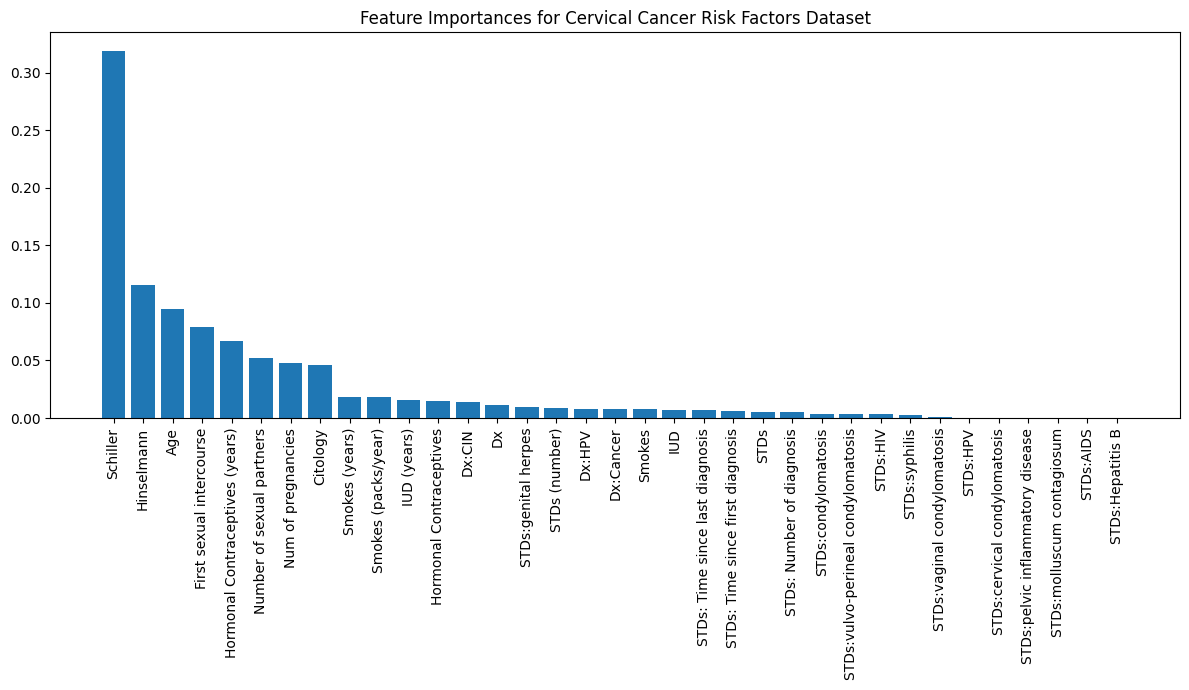

In [6]:
# Sorting the features based on importance and plotting
indices_cervical = np.argsort(importances_cervical)[::-1]
plt.figure(figsize=(12, 7))
plt.title("Feature Importances for Cervical Cancer Risk Factors Dataset")
plt.bar(range(X_cervical.shape[1]), importances_cervical[indices_cervical], align="center")
plt.xticks(range(X_cervical.shape[1]), np.array(data_cervical.columns)[indices_cervical], rotation=90)
plt.tight_layout()
plt.show()


# C. Bike Sharing Dataset

1. Introduction
The Bike Sharing dataset contains daily counts of rental bikes along with weather and seasonal information. We'll determine which factors most affect bike rentals.
2. Loading Data and Initial Exploration

In [8]:
# Load bike sharing dataset (assuming you have it locally or provide the path)
data_bike = pd.read_csv("day.csv")

# Display the first few rows of the dataset for an overview
data_bike.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


3. Data Preprocessing
Handling date-time columns and scaling numerical features for better model performance.

In [9]:
# Dropping the 'dteday' column as it's a timestamp and won't be useful for our current exploration
data_bike = data_bike.drop('dteday', axis=1)

# Splitting dataset into features and target variable
X_bike = data_bike.drop('cnt', axis=1) # 'cnt' is the total count of bike rentals
y_bike = data_bike['cnt']

# Standardizing the feature values
scaler_bike = StandardScaler()
X_bike = scaler_bike.fit_transform(X_bike)


4. Feature Importance Calculation

In [10]:
# Using RandomForest to compute feature importance for bike dataset
rf_bike = RandomForestClassifier()
rf_bike.fit(X_bike, y_bike)
importances_bike = rf_bike.feature_importances_


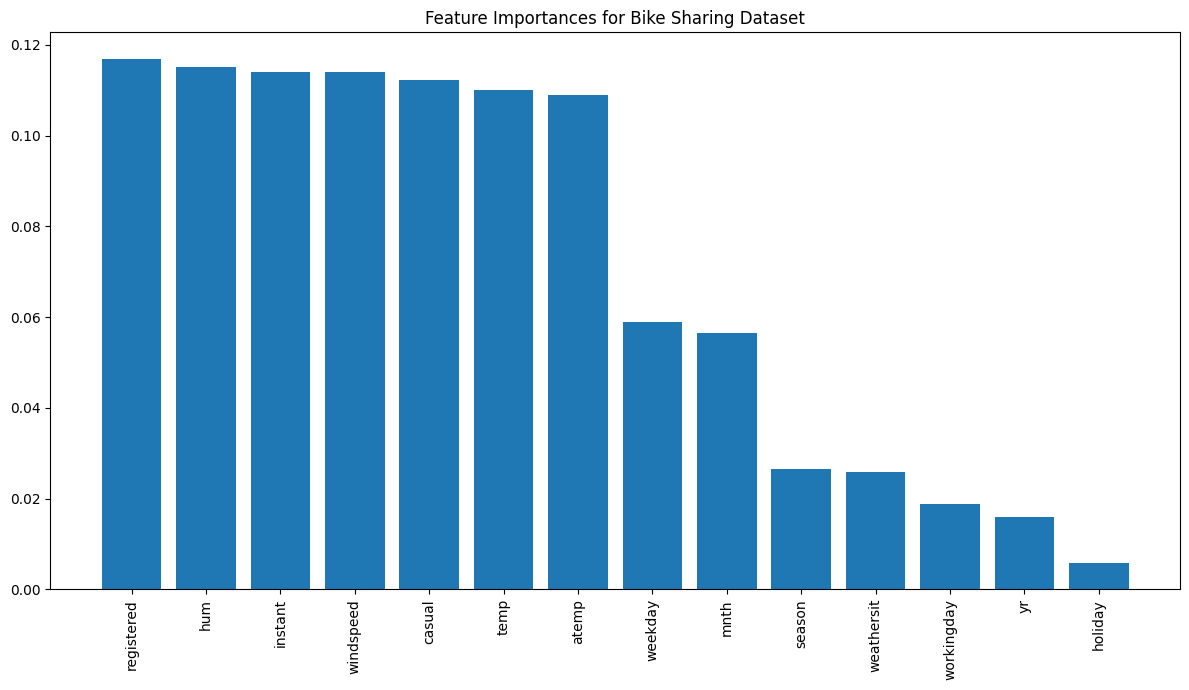

In [11]:
# Sorting the features based on importance and plotting
indices_bike = np.argsort(importances_bike)[::-1]
plt.figure(figsize=(12, 7))
plt.title("Feature Importances for Bike Sharing Dataset")
plt.bar(range(X_bike.shape[1]), importances_bike[indices_bike], align="center")
plt.xticks(range(X_bike.shape[1]), np.array(data_bike.columns)[indices_bike], rotation=90)
plt.tight_layout()
plt.show()
